# DATA VISUALIZATION AND DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Data = pd.read_csv('DRUG.csv', usecols=['review','rating'])
Data.head()

,review,rating
0,"""i have used restasis for about a year now and...",2.0
1,"""my experience has been somewhat mixed. i have...",7.0
2,"""this is my second implanon would not recommen...",1.0
3,"""i recommend taking as prescribed, and the bot...",10.0
4,"""i have been on ampyra for 5 days and have bee...",9.0


In [4]:
Data.tail()

,review,rating
110806,"""i had tried many medications to level out my ...",8.0
110807,"""had partial thyroid removal with benign tumor...",7.0
110808,"""my experience with risperdal started when i f...",8.0
110809,"""my elderly dad was prescribed a low dose of a...",1.0
110810,"""latuda has been a hero in my battle against s...",10.0


<Axes: xlabel='rating', ylabel='count'>

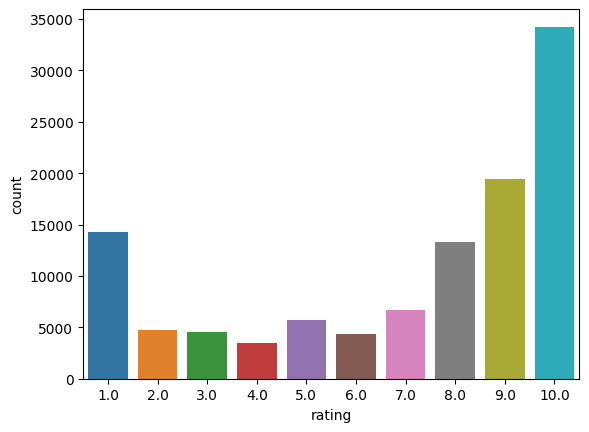

In [5]:
sns.countplot(x='rating',data=Data)

(array([14286.,  4776.,  4540.,  3501.,  5711.,  4359.,  6671., 13305.,
        19407., 34255.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

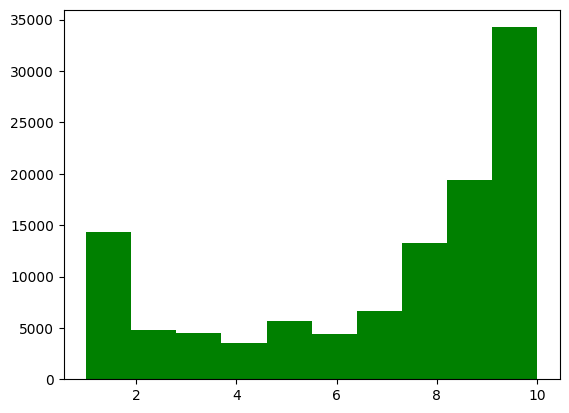

In [6]:
plt.hist(Data['rating'],color='green')

<Axes: ylabel='Density'>

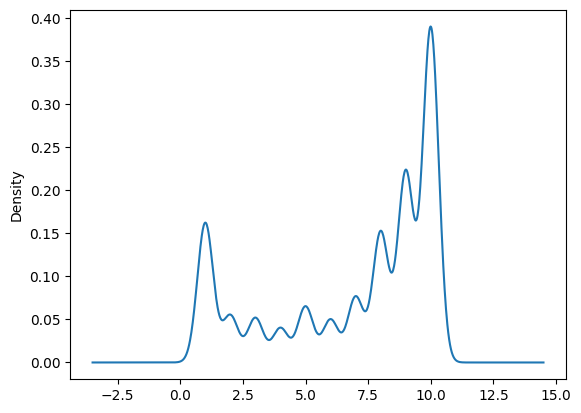

In [7]:
Data['rating'].plot(kind='density')

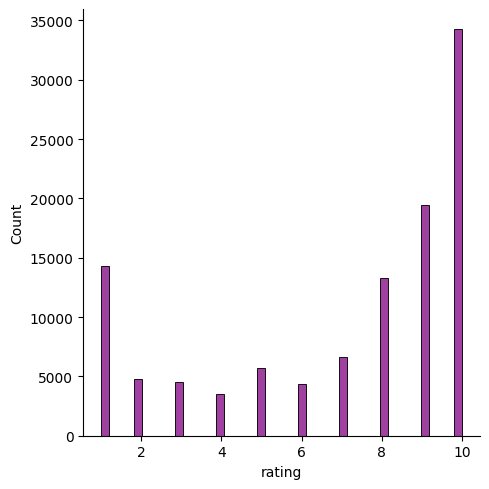

In [8]:
sns.displot(Data['rating'], color='purple') 

<Axes: >

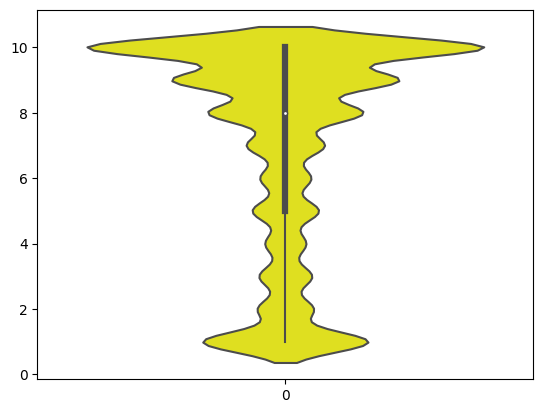

In [9]:
sns.violinplot(Data['rating'], color='yellow') 

<Axes: xlabel='rating', ylabel='Proportion'>

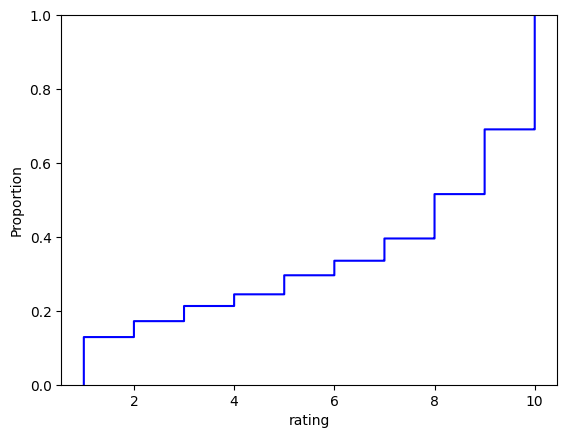

In [10]:
sns.ecdfplot(Data['rating'], color='blue') 

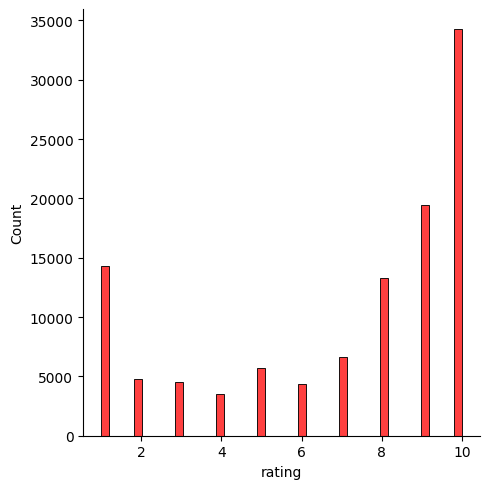

In [11]:
sns.displot(Data['rating'], color='RED') 

In [12]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [13]:
# Define preprocess function for text preprocessing

def preprocess_text(text):
    
    # Check for NaN values and handle them
    
    if pd.isnull(text):
        return ""
    
    # Convert to lowercase
    
    text = text.lower()
    
    # Remove special characters and digits
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization and remove stop words
    
    stop_words = set(stopwords.words('english'))
    
    words = [word for word in word_tokenize(text) if word not in stop_words]
    
    # Stemming
    
    ps = PorterStemmer()
    
    words = [ps.stem(word) for word in words]
    
    # Join the preprocessed words back into a single string
    
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [14]:
Data['review'] = Data['review'].apply(preprocess_text)

In [15]:
from sklearn.model_selection import train_test_split

X,X_test,y,y_test = train_test_split(Data.loc[:,'review':],Data['rating'],test_size=0.2)

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 799.5, 799.5, -0.5)

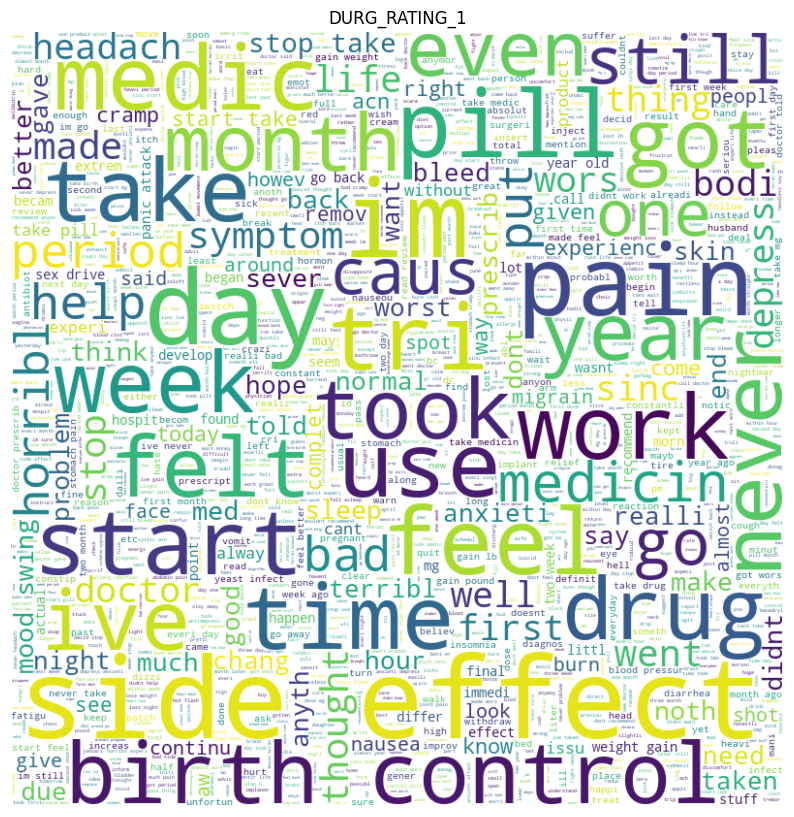

In [17]:
Rating1=' '.join(X.loc[y==1,'review'].values)
Rating1_text = WordCloud(background_color='white',max_words=2000,width = 800, height = 800).generate(Rating1)

plt.figure(figsize=[10,30])

plt.imshow(Rating1_text,interpolation='bilinear')
plt.title('DURG_RATING_1')
plt.axis('off')

Text(0.5, 1.0, 'DURG_RATING_2')

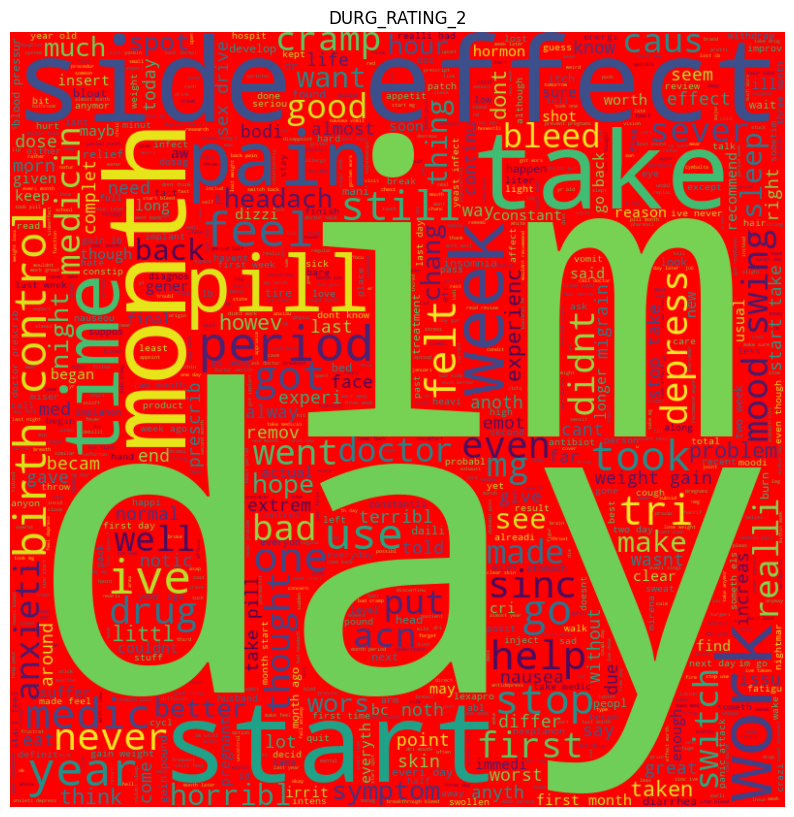

In [18]:
Rating2=' '.join(X.loc[y==2 ,'review'].values)
Rating2_text = WordCloud(background_color='RED',max_words=2000,width = 800, height = 800).generate(Rating2)

plt.figure(figsize=[10,30])

plt.imshow(Rating2_text, interpolation='bilinear')
plt.axis('off')
plt.title('DURG_RATING_2')